In [1]:
from astropy.io import fits
import cv2
import os
from numpy import *
from matplotlib.pyplot import*
import requests

In [43]:
import os
import requests

folder = ['Bias', 'Dark', 'Flat', 'Light']
file = [
    ['b01.fits', 'b02.fits', 'b03.fits', 'b04.fits', 'b05.fits', 'b06.fits', 'b07.fits', 'b08.fits', 'b09.fits',
     'b10.fits', 'b11.fits'],
    ['dark_300s.fits'],
    ['Flat_B_50s.fits', 'Flat_B_60s.fits', 'Flat_I_1p5s.fits', 'Flat_R_2p3s.fits', 'Flat_V_10s.fits'],
    ['NGC_2194B.fits', 'NGC_2194I.fits', 'NGC_2194R.fits', 'NGC_2194V.fits', 'NGC_2403B.fits', 'NGC_2403I.fits',
     'NGC_2403R.fits', 'NGC_2403V.fits']
]

for i in range(len(folder)):
    for j in range(len(file[i])):
        save_path = f'/run/media/rajapandi/New Volume/Entertainment/St. Xaviers college/MSc/Sem 2/Practicals/Observational Astronomy/Practical 2/{folder[i]}/{file[i][j]}'
        os.makedirs(os.path.dirname(save_path), exist_ok=True) 
        url = f'http://www.phyast.pitt.edu/~wmwv/Classes/A1263/Labs/Lab3/images/{folder[i]}/{file[i][j]}'
        response = requests.get(url)
        with open(save_path, 'wb') as file_obj:
            file_obj.write(response.content)



In [2]:
folder_path = '/run/media/rajapandi/New Volume/Entertainment/St. Xaviers college/MSc/Sem 2/Practicals/Observational Astronomy/Practical 2/Bias'


bias = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.fits'):
        file_path = os.path.join(folder_path, file_name)
        
        # Read the FITS file data (modify this part based on your FITS file structure)
        with fits.open(file_path) as hdul:
            data = hdul[0].data  # Assuming the data is in the primary header
            bias.append(data)
bias_array = array(bias)
# Take the average along the specified axis (0 for the average along the stack of images)
Master_bias = mean(bias_array, axis=0)

In [3]:
cv2.imwrite('Master_bias_B.png',Master_bias)

True

In [5]:
folder_path = '/run/media/rajapandi/New Volume/Entertainment/St. Xaviers college/MSc/Sem 2/Practicals/Observational Astronomy/Practical 2/Light'
file_path = os.path.join(folder_path,'NGC_2194B.fits')
Light = fits.open(file_path)[0].data 

In [6]:
folder_path = '/run/media/rajapandi/New Volume/Entertainment/St. Xaviers college/MSc/Sem 2/Practicals/Observational Astronomy/Practical 2/Dark'
file_path = os.path.join(folder_path,'dark_300s.fits')
Dark = fits.open(file_path)[0].data

In [7]:
folder_path = '/run/media/rajapandi/New Volume/Entertainment/St. Xaviers college/MSc/Sem 2/Practicals/Observational Astronomy/Practical 2/Flat'
file_path = os.path.join(folder_path,'Flat_B_50s.fits')
Flat = fits.open(file_path)[0].data

In [8]:
Master_flat = Flat - Master_bias - Dark

In [9]:
cv2.imwrite('Master_flat_B.png',Master_flat)

True

In [10]:
Corrected_Light = Light - Dark - Master_bias

In [11]:
cv2.imwrite('corrected_science_B.png',Corrected_Light)

True

In [12]:
light_C = Corrected_Light/Master_flat

In [13]:
cv2.imwrite('file_B.png',light_C)

True

In [14]:
mean = mean(Master_flat)
Master_Flat = 255*(Master_flat - mean)/(mean)

In [15]:
cv2.imwrite('Master_Flat_B.png',Master_Flat)

True

In [16]:
Light_C = Corrected_Light/Master_Flat

In [ ]:
print(Light_C)

[[12.77970287 15.55427664 15.3992262  ... 16.82811374 16.66019352
  14.29748237]
 [17.67985548 28.02015426 29.9659321  ... 35.48297973 34.06079825
  21.35722185]
 [17.69584216 28.2708181  33.09359738 ... 41.61412597 40.47886358
  22.60689587]
 ...
 [17.07519268 26.24953467 28.19214223 ... 35.81020649 33.42079393
  20.68229217]
 [17.27480895 24.50730256 26.17855104 ... 31.14752797 29.57353469
  18.56719123]
 [15.13736052 19.04230117 20.35216667 ... 23.22067579 20.99003176
  15.99719545]]


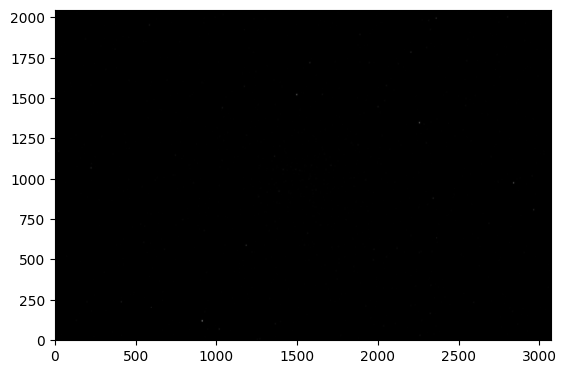

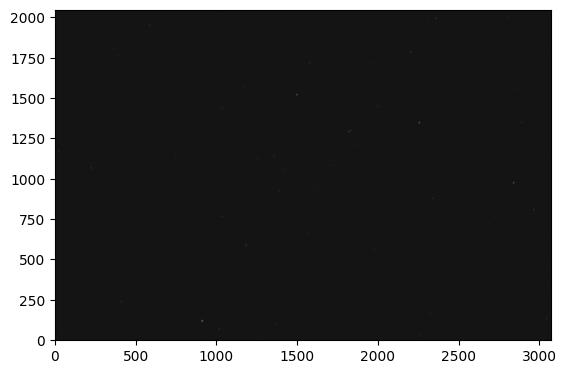

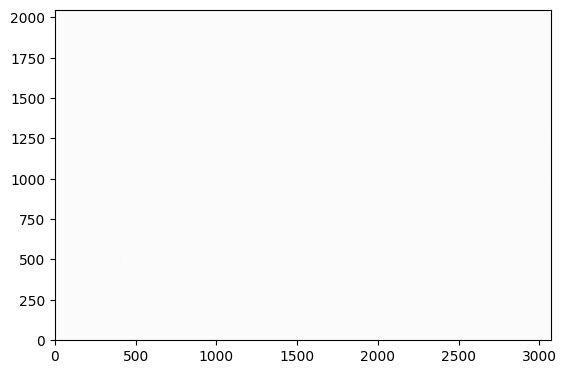

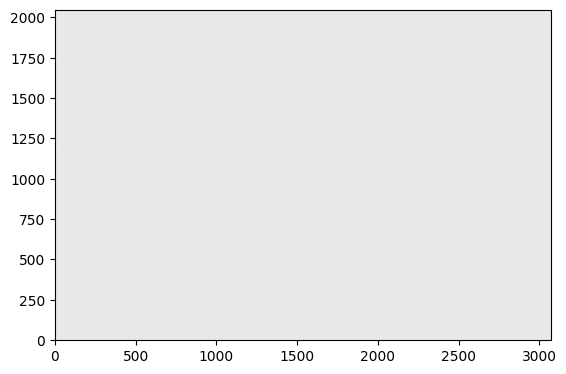

In [17]:
imshow(Light,cmap='gray', origin='lower')
show()
imshow(Corrected_Light,cmap='gray', origin='lower')
show()
imshow(Light_C,cmap='gray', origin='lower')
show()
imshow(light_C,cmap='gray', origin='lower')
show()

/path/to/save/folder1/file1_1
/path/to/save/folder1/file1_2
/path/to/save/folder2/file2_1
/path/to/save/folder2/file2_2
